这个文档实现的是决策树回归器(sklearn.tree.DecisionTreeRegressor)(考察splitter,max_depth)

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation
import matplotlib.pyplot as plt

S:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


给出一个随机产生的数据集：

In [2]:
def creat_data(n):
    np.random.seed(0)
    X = 5 * np.random.rand(n,1)
    y = np.sin(X).ravel()
    noise_num = (int)(n/5)
    y[::5] += 3 * (0.5-np.random.rand(noise_num))
    return cross_validation.train_test_split(X,y,test_size=0.25, random_state=1)

给出测试函数：

In [3]:
def test_DecisionTreeRegressor(*data):
    X_train,X_test,y_train,y_test = data
    regr = DecisionTreeRegressor()
    regr.fit(X_train,y_train)
    print("Training score:%f"%(regr.score(X_train,y_train)))
    print("Testing score:%f"%(regr.score(X_test,y_test)))
    
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    X = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    Y = regr.predict(X)
    ax.scatter(X_train,y_train,label="train sample",c='g')
    ax.scatter(X_test,y_test,label="test sample",c='r')
    ax.plot(X,Y,label="predict_value", linewidth=2,alpha=0.5)
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()

调用该函数：

Training score:1.000000
Testing score:0.789107


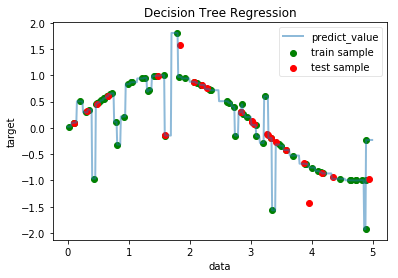

In [4]:
X_train,X_test,y_train,y_test = creat_data(100)
test_DecisionTreeRegressor(X_train,X_test,y_train,y_test)

接下来考察参数**splitter的随机划分与最忧划分**的影响：

In [5]:
def test_DecisionTreeRegressor_splitter(*data):
    X_train,X_test,y_train,y_test = data
    splitters = ['best', 'random']
    for splitter in splitters:
        regr = DecisionTreeRegressor(splitter = splitter)
        regr.fit(X_train,y_train)
        print("Splitter %s"%splitter)
        print("Training score:%f"%(regr.score(X_train,y_train)))
        print("Testing score:%f"%(regr.score(X_test,y_test)))

调用函数：

In [6]:
X_train,X_test,y_train,y_test = creat_data(100)
test_DecisionTreeRegressor_splitter(X_train,X_test,y_train,y_test)

Splitter best
Training score:1.000000
Testing score:0.789107
Splitter random
Training score:1.000000
Testing score:0.778989


最后考察**决策树深度**的影响，决策树越深模型越复杂

In [7]:
def test_DecisionTreeRegressor_depth(*data, maxdepth):
    X_train,X_test,y_trian,y_test = data
    depths = np.arange(1,maxdepth)
    training_scores = []
    testing_scores = []
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
        
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="training score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
    

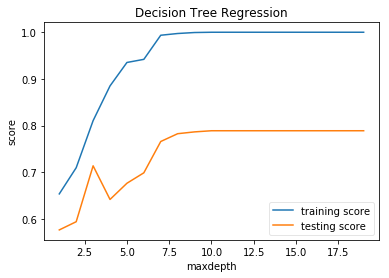

In [8]:
X_train,X_test,y_train,y_test = creat_data(100)
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=20)